# Comparação de modelos

- Entropia
- AIC
- AICc
- BIC

In [1]:
using Random
using Statistics
using LinearAlgebra
using Plots
theme(:ggplot2)

## Critérios de informação

### Critério de AIC

- O critério de informação de Akaike *(Akaike Information Criteria)* é uma medida relativa da qualidade do ajuste.

- Ele penaliza modelos com muitos parâmetros.

- Entre modelos com RMS próximos, o critério ajuda a selecionar o que tem menos parâmetros (menos custoso).

- É definido por

$$ \mathrm{AIC} = N\ln E + 2m,
$$

onde $m$ é o número de parâmetros do modelo e $E$ é o **erro quadrático médio** do mesmo:

$$ E = \frac{1}{N}\sum_{j=1}^N (\hat y_j - y_j)^2 = \mathrm{RMS}(r_j)^2 = \frac{\mathrm{SS}(r_i)}{N},
$$

- É comum vermos escrito na forma

$$ \mathrm{AIC} = N\ln\left(\frac{\mathrm{SS}(r_i)}{N}\right) + 2m.
$$

- A definição acima, na verdade, é estritamente para modelos lineares nos parâmetros, ajustados via mínimos quadrados e com erros distribuidos normalmente e com variância constante.

- Em situações mais gerais, no entanto, a função de log-verosimilhança deve ser utilizada.

#### Dependência na quantidade de dados e de parâmetros

- O critério AIC vem de Teoria da Informação:

  - Assumindo que os dados são gerados por um certo processo desconhecido $\mathcal{P}$;    
  - E que há $J$ candidatos a modelos do processo, $\mathcal{M}_j$, $j=1, \ldots, J$;
  - $\mathrm{AIC}_j$ é uma medida da perda de informação obtida usando-se o modelo $j$.
  - O modelo com o menor AIC é o modelo com a menor perda de informação.
    
- Mas, como tal, ele vem de um resultado assintótico e é mais utilizado quando há um número relativamente grande de dados, da ordem de

$$ \frac{N}{M} \gtrsim 40,
$$

onde $M=\max_j\{m_j\}$ é o número de parâmetros do modelo com mais parâmetros dentre os modelos considerados.

### AIC corrigido

- Caso não haja dados suficientes, utiliza-se o **AIC corrigido:**

$$ \mathrm{AICc} = N\ln\left(\frac{\mathrm{SS}(r_i)}{N}\right) + \frac{2m(m+1)}{N-m-1}.
$$

- Assintoticamente, quando $N\rightarrow \infty$, a correção decai pra zero e os dois critérios coincidem.

### BIC (Bayesian Information Criteria)

* Este é um outro critério muito próximo do AIC e é definido por

$$ \mathrm{BIC} = N\ln(E) + m\ln(N).
$$

* Foi proposto por Gideon Schwarz (1978).

* A inclusão do termo multiplicativo $\ln(N)$ tem mais efeito no caso de um número grande de dados, mas em termos teóricos ele tem uma diferença significativa: se o modelo correto for incluído na comparação, este critério é garantido de selecioná-lo como o "melhor". Por outro lado, em certos casos patológicos, o critério de AIC pode selecionar um modelo diferente.

## Informação e entropia

* No caso de uma distribuição de probabilidades $\rho$ em um conjunto finito $\mathcal{X}$, a **informação** $I(x)$ de um possível evento $x\in\mathcal{X}$ e a **entropia da informação ou entropia de Shannon** $H(\rho)$ da distribuição são dadas por

$$ I(x) = - \ln \rho(x), \qquad H(\rho) = - \sum_{x\in \mathcal{X}} \rho(x)\ln \rho(x).
$$

* No caso de uma distribuição de probabilidades $\rho$ em $\mathcal{X} = \mathbb{R}$ (ou em várias variáveis ou em subconjutos de um ou de outro), com função densidade de probabilidades $f$, temos a **informação** e a **entropia diferencial** definidas por

$$ I(x) = - \ln f(x), \qquad H(\rho) = - \int_\mathcal{X} f(x) \ln f(x) \;dx.
$$

* No caso contínuo, $I(x)$ está mais para uma *densidade de informação*, com a informação de um evento $x$ em um intervalo "infinitesimal" de tamanho $dx$ sendo $I(x)dx$. E a *entropia diferencial* não tem as mesmas interpretações e propriedades da entropia de Shannon. Em muitos casos, trabalha-se com *entropia relativa*, baseada na *divergência de Kullback-Leibler*.

### Interpretação da informação

* A ideia da informação é representar uma medida do "ganho de informação", ou da "surpresa", obtida com a realização de um evento $x$.

* Quanto menor a probabilidade $\rho(x)$ de $x$, maior a surpresa. Por isso a razão da informação conter uma função decrescente em $x$.

* Se a probabilidade do evento for $\rho(x) = 1$, ou seja, é um evento "certo", então não há surpresa e a informação é nula, $I(x) = \ln \rho(x) = - \ln 1 = 0.$

* Já se $\rho(x) = 0$, ou seja, o evento $x$ é totalmente improvável, então a surpresa com a sua realização é infinita.

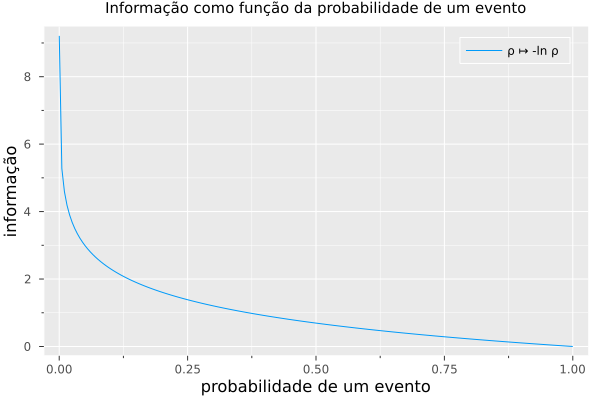

In [2]:
probvalues = range(0.0001, 1.0, length=200)
plot(probvalues, ρ -> -log(ρ), xlabel="probabilidade de um evento", ylabel="informação",
    label="ρ ↦ -ln ρ",
    title="Informação como função da probabilidade de um evento", titlefont=10)

### Informação no caso de componentes independentes

* Mas por que o logaritmo?

* Pela sua propriedade de $\ln(ab) = \ln a + \ln b$.

* Caso tenhamos componentes independentes $\mathcal{X} = \mathcal{X}_1 \times \mathcal{X}_2$, com uma distribuição de probabilidade $\rho = \rho_1 \otimes \rho_2$, então

$$ I_\rho(x) = I_\rho(x_1, x_2) = -\ln (\rho_1(x_1)\rho_2(x_2)) = - \ln\rho_1(x_1) - \ln\rho_2(x_2) = I_{\rho_1}(x_1) + I_{\rho_2}(x_2).
$$

* Ou seja, o ganho de informação com a ocorrência de um evento com componentes de naturezas diferentes e independentes é a soma do ganho de informações com cada componente.

### Informação no caso contínuo

* No caso contínuo, a interpretação não é bem a mesma, já que a função densidade de probabilidade $f=f(x)$ não precisa assumir valores entre zero e um, como ocorre com $\rho(x)$ no caso discreto.

* Assim, $I(x)$ pode ser negativo.

* O mais preciso seria considerar a informação $I(x)dx$ de um evento ocorrer em um intervalo contendo $x$ e de comprimento $dx$. Ou, mais precisamente, $\int_J I(x)\;dx$ como sendo o ganho de informação, ou a surpresa, de um evento ocorrer em um intervalo $J$.

### Interpretação da entropia

* Tanto no caso discreto como no contínuo, vemos que a entropia é o valor esperado da informação:

$$ H(\rho) = \int_\mathcal{X} I(x) f(x) dx = \mathbb{E}(I), \qquad H(\rho) = \sum_{x\in \mathcal{X}} I(x)\rho(x) = \mathbb{E}(I).
$$

* Ela representa o nível médio de informação, ou de surpresa, associada às possíveis ocorrências de eventos.

* Distribuições de probabilidades com a informação mais "espalhada" tem maior entropia, ou maior surpresa, ao passo que informações mais "concentradas" levam a uma menor entropia, ou menor surpresa.

* No caso de $\rho(x) = 0$, temos $I(\rho) = +\infty$, mas o valor de $-\rho\ln \rho$ é tomado como sendo nulo, acompanhando o limite de quando $\rho\searrow 0$:

$$ - 0 \ln 0 = \lim_{\rho \rightarrow 0^+} -\rho \ln(\rho) = 0.
$$

* A definição de entropia da informação é idêntica à da entropia em termodinâmica, onde a informação é substituída pela energia dos "microestados", que são os diferentes modos de distribuição da energia interna do sistema.

* No caso contínuo, a interpretação da entropia também é mais delicada, como consequência das ponderações feitas acima sobre a interpretação da informação neste caso.

### Distribuições de Bernoulli

* Para efeito de ilustração, considere uma distribuição de Bernoulli $\rho_p$ com probabilidades $p$ e $1-p$.

* Ou seja, o espaço de probabilidades contém apenas dois elementos, digamos $\mathcal{X}=\{x_1, x_2\}$, com probabilidades $\rho_p(x_1) = p$ e $\rho_p(x_2) = 1 - p$, onde $0 \leq p \leq 1$.

* Nesse caso,

$$ H(\rho_p) = - p\ln p - (1-p)\ln(1-p).
$$

* Caso $p=1$ ou $p=0$, não há surpresa e temos entropia nula:

$$ H(\rho_1) = H(\rho_0) = -1\ln 1 - 0\ln 0 = 0 + 0 = 0.
$$

* Caso $p=1/2$, a entropia é

$$ H(\rho_{1/2}) = - 2 \frac{1}{2}\ln\left(\frac{1}{2}\right) = \ln 2.
$$

* O caso $p=1/2$ nos dá entropia máxima. Verifique!

* Observe que, nesse caso $p=1/2$, a informação está igualmente distribuída nos dois elementos do espaço, ou seja, está a mais espalhada possível.

* Distribuições de Bernouilli estão relacionadas a eventos com respostas binárias, como sim ou não, ou como a possibilidade de um único evento ocorrer ou não.

* É clássico mencionar que, em um questionário com respostas sim ou não, ganha-se mais informação com perguntas que tem probabilidades iguais de respostas sim e não.

## Divergência de Kullback-Leibler

* A divergência, ou informação, de Kullback-Leibler é a informação de um modelo relativa ao "modelo real".

* Supondo que $\mu$ represente o fenômeno real e que $\rho$ seja a distribuição de probabilidades de um modelo, a divergência de Kullback-Leibler do modelo $\rho$ é

$$ D_{KL}(\rho \| \mu) = \sum_{x\in \mathcal{X}} \mu(x)\ln\left(\frac{\mu(x)}{\rho(x)}\right).
$$

* No caso discreto, com distribuições $g$ e $f$ de $\mu$ e $\rho$, respectivamente, temos

$$ D_{KL}(\rho \| \mu) = \int_{\mathcal{X}} g(x) \ln\left(\frac{g(x)}{f(x)}\right)\;dx.
$$

* Em termos práticos, $D_{KL}$ não pode ser utilizado diretamente, pois $\mu$ é desconhecida. É justamente $\mu$ que queremos inferir.

* Mas ele pode ser explorado para se comparar dois modelos diferentes. Isso é o que foi feito por Akaike.

### Comparando modelos através da divergência de Kullback-Leibler

* Podemos reescrever

$$ D_{KL}(\rho \| \mu) = \int_{\mathcal{X}} g(x) \ln\left(\frac{g(x)}{f(x)}\right)\;dx = \int_{\mathcal{X}} g(x) \ln g(x) \;dx - \int_{\mathcal{X}} g(x) \ln f(x) \;dx.
$$

* Observe a semelhança com a entropia.

* Observe, ainda, que o primeiro termo é independente do modelo.

* Se tivermos dois modelos, $\rho_1$ e $\rho_2$, então podemos comparar as respectivas discrepâncias:

$$ D_{KL}(\rho_1 \| \mu) = \int_{\mathcal{X}} g(x) \ln g(x) \;dx - \int_{\mathcal{X}} g(x) \ln f_1(x) \;dx.
$$
$$ D_{KL}(\rho_2 \| \mu) = \int_{\mathcal{X}} g(x) \ln g(x) \;dx - \int_{\mathcal{X}} g(x) \ln f_2(x) \;dx.
$$

* Para vermos qual é a de menor discrepância, podemos comparar apenas o último termo de cada um:
$$ - \int_{\mathcal{X}} g(x) \ln f_1(x) \;dx \qquad \text{e} \qquad - \int_{\mathcal{X}} g(x) \ln f_2(x) \;dx
$$

* O que tiver a menor discrepância, nos dará o modelo mais próximo "da realidade".

* Mas observe que esse termo também não é, em geral, conhecido plenamente, pois a função densidade de probabilidade $g(x)$ de $\mu$ é desconhecida.

### Conexão com o critério de Akaike

* Mas apesar do termo restante não poder ser calculado, podemos estimar assintociamente essa divergência.

* Akaike mostrou que, assintoticamente, em relação ao número de dados da amostra, e sob certas condições, vale a aproximação deste termo por

$$ N\ln\left(\frac{\mathrm{SS}(r_i)}{N}\right) + 2m,
$$

onde $N$ é o número de dados e $m$ é o número de parâmetros do modelo.

* Assim, o modelo com o menor índice AIC seria um forte candidato a ser o mais próximo do real.

## Exemplo sintético

Neste exemplo sintético, vamos 

- Construir dados sintéticos a partir de perturbações aleatórias em torno de uma determinada função.

- Perturbações uniformemente distribuídas entre $\pm 0.3$ na abscissa.

- Perturbações uniformemente distribuídas entre $\pm 1$ na ordenada.

- Em seguida, usaremos mínimos quadrados para ajustar um polinômio de grau três.

- Posteriormente, mínimos quadrados para ajustar polinômios de diversos graus.

### Função para cálculo das medidas de qualidade do modelo

In [3]:
function info_ajuste2(dados_x, dados_y, model_y, m)
    N = length(dados_x)
    y_mean = mean(dados_y)
    residuos = model_y - dados_y
    ss = norm(residuos)^2
    rms = sqrt(ss/N)
    ss_y = norm(dados_y)^ 2
    rms_y = sqrt(ss_y/N)

    ss_rel = ss/ss_y
    rms_rel = sqrt(ss_rel)
    ss_tot = N*var(dados_y)
    ss_reg = norm(model_y .- y_mean)^2
    r_sq = ss_reg/ss_tot
    r_sq_aj = 1 - (1 - r_sq)*(N-1)/(N-m)
    
    aic = N*log(ss/N) + 2*m
    aicc = N*log(ss/N) + (2*m*(m+1))/(N-m-1)
    bic =  N*log(ss/N) + 2*log(N)*m
    
    return (
        residuos=residuos, rms=rms, rms_rel=rms_rel, ss=ss, ss_rel=ss_rel,
        r_sq=r_sq, r_sq_aj=r_sq_aj, aic=aic, aicc=aicc, bic=bic
    )
end

info_ajuste2 (generic function with 1 method)

### Definição do modelos e dos dados

In [4]:
f_modelo(x, β) = β ⋅ [x^j for j in 0:length(β)-1]
f_dados(x,β) = exp(β[4]*x) * (β[1] + β[2]*x + β[3]*x^2 + β[4]*x^3)
β̲ = [5.2, 0.5, -0.45, 0.05]
x = -1.0:0.1:8.0
nothing

In [5]:
dados_x = collect(0.0:0.4:7.6) .+ 0.1 * randn(MersenneTwister(15001), 20)
dados_y = f_dados.(dados_x, Ref(β̲)) .+ 0.5 * randn(MersenneTwister(15021), 20)
nothing

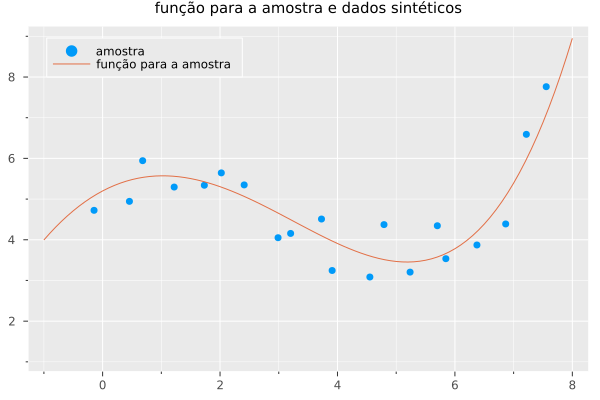

In [6]:
plot(xlim=(-1,8), ylim=(1,9), legend=:topleft,
    titlefont=10, title="função para a amostra e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
plot!(x, x->f_dados(x,β̲), label="função para a amostra")

### Modelos polinomiais

In [7]:
max_grau = 12
β̂ = []
info = []
for grau in 0:max_grau
    A = reduce(hcat, [dados_x.^j for j=0:grau])
    push!(β̂, A \ dados_y)
    push!(info, info_ajuste2(
            dados_x, dados_y, 
            f_modelo.(dados_x, Ref(β̂[grau+1])), length(β̂[grau+1])
            )
        )
end

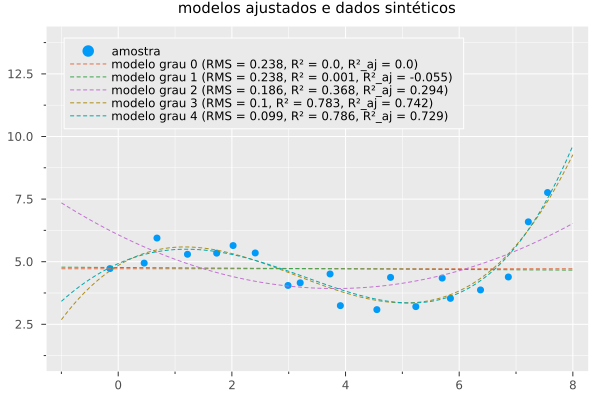

In [8]:
plot(xlim=(-1,8), ylim=(1,14), legend=:topleft,
    titlefont=10, title="modelos ajustados e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
for grau in 0:4
    plot!(x, x -> f_modelo(x, β̂[grau+1]),
        label="modelo grau $grau (RMS = $(round(info[grau+1].rms_rel,digits=3)), " *
            "R² = $(round(info[grau+1].r_sq,digits=3)), " *
            "R²_aj = $(round(info[grau+1].r_sq_aj,digits=3)))",
        linestyle=:dash)
end
plot!()

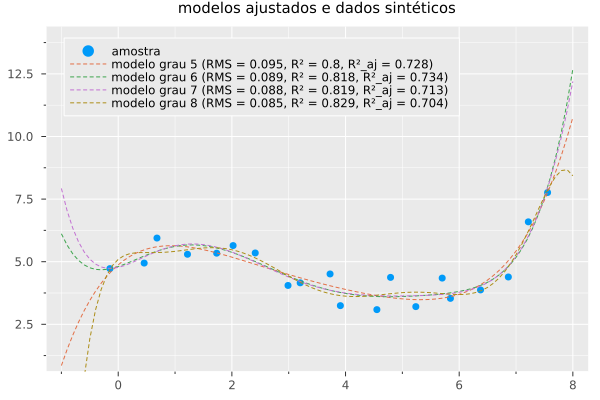

In [9]:
plot(xlim=(-1,8), ylim=(1,14), legend=:topleft,
    titlefont=10, title="modelos ajustados e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
for grau in 5:8
    plot!(x,x->f_modelo(x,β̂[grau+1]),
        label="modelo grau $grau (RMS = $(round(info[grau+1].rms_rel,digits=3)), " *
            "R² = $(round(info[grau+1].r_sq,digits=3)), " *
            "R²_aj = $(round(info[grau+1].r_sq_aj,digits=3)))",
        linestyle=:dash)
end
plot!()

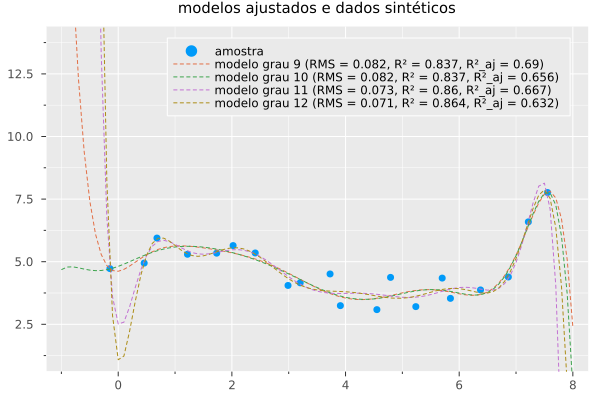

In [10]:
plot(xlim=(-1,8), ylim=(1,14), legend=:topright,
    titlefont=10, title="modelos ajustados e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
for grau in 9:max_grau
    plot!(x,x->f_modelo(x,β̂[grau+1]),
        label="modelo grau $grau (RMS = $(round(info[grau+1].rms_rel,digits=3)), " *
            "R² = $(round(info[grau+1].r_sq,digits=3)), " *
            "R²_aj = $(round(info[grau+1].r_sq_aj,digits=3)))",
        linestyle=:dash)
end
plot!()

### Visualização dos fatores de qualidade de ajuste em funcão do grau do modelo

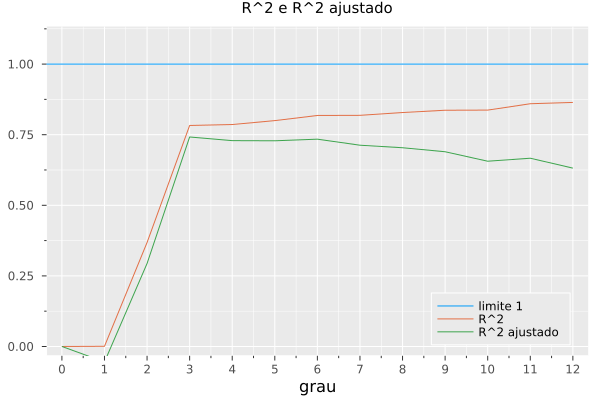

In [11]:
plot(title="R^2 e R^2 ajustado", titlefont=10, ylims=(0,1.1), legend=:bottomright,
    xlabel="grau", xticks=0:max_grau)
hline!([1.0], label="limite 1")
plot!(0:max_grau, [info[j+1].r_sq for j in 0:max_grau], label="R^2")
plot!(0:max_grau, [info[j+1].r_sq_aj for j in 0:max_grau], label="R^2 ajustado")

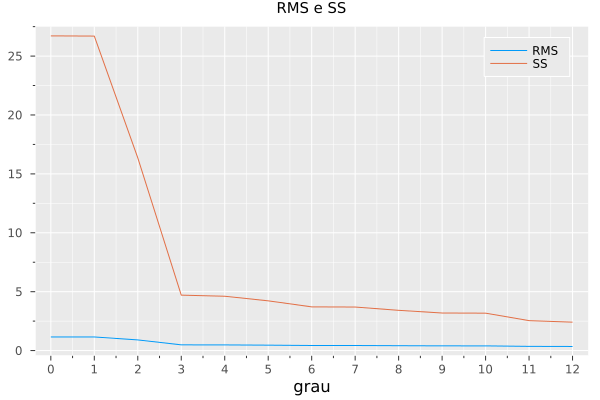

In [12]:
plot(title="RMS e SS", titlefont=10, xlabel="grau", xticks=0:max_grau)
plot!(0:max_grau, [info[j+1].rms for j in 0:max_grau], label="RMS")
plot!(0:max_grau, [info[j+1].ss for j in 0:max_grau], label="SS")

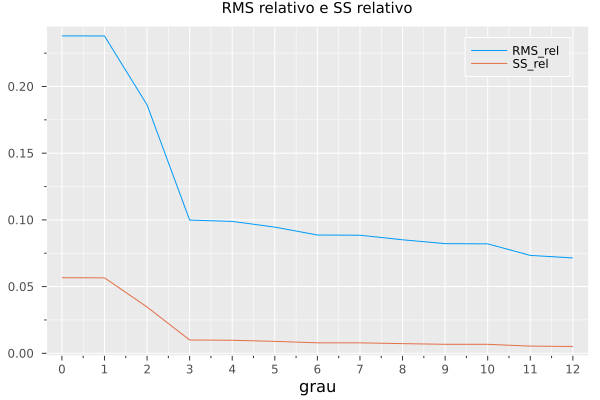

In [13]:
plot(title="RMS relativo e SS relativo", titlefont=10, xlabel="grau", xticks=0:max_grau)
plot!(0:max_grau, [info[j+1].rms_rel for j in 0:max_grau], label="RMS_rel")
plot!(0:max_grau, [info[j+1].ss_rel for j in 0:max_grau], label="SS_rel")

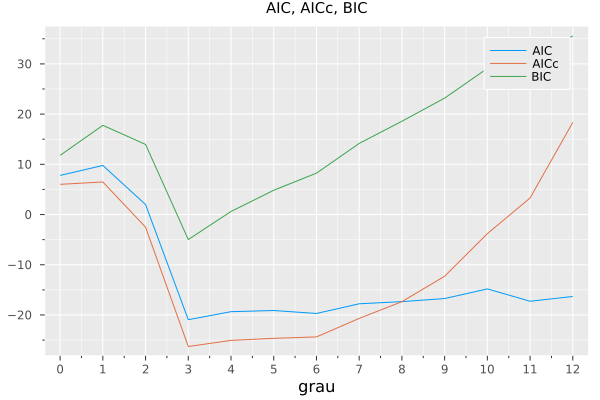

In [14]:
plot(title="AIC, AICc, BIC", titlefont=10, xlabel="grau", xticks=0:max_grau)
plot!(0:max_grau, [info[j+1].aic for j in 0:max_grau], label="AIC")
plot!(0:max_grau, [info[j+1].aicc for j in 0:max_grau], label="AICc")
plot!(0:max_grau, [info[j+1].bic for j in 0:max_grau], label="BIC")

## Referências

1. K. B. Burnham, D. R. Anderson, Model Selection and Multimodel Inference: A Practical Information-Theoretic Approach, 2nd edition, Springer, 2002.

1. S. L. Brunton, J. N. Kutz, Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control, Cambridge University Press, 2019.

1. G. Schwarz, Estimating the dimension of a model, The Annals of Statistics, 6(2) (1978), 461-464.

1. T. J. Sullivan, Introduction to Uncertainty Quantification, Texts in Applied Mathematics, vol. 63, Springer International Publishing, 1995.

## Exercícios

1. Mostre, no caso de uma distribuição de Bernouille como descrita acima, a entropia é máxima em $p=1/2$, ou seja, mostre que o máximo de $ H(\rho_p) = - p\ln p - (1-p)\ln(1-p)$ em $0\leq p \leq 1$ ocorre em $p=1/2$.

1. Considere o problema de modelagem de reação enzimática em fígados de porcos, discutido no caderno 8, sobre **Modelos redutíveis ao caso linear nos parâmetros e aplicações**. Calcule os fatores de qualidade de ajuste (RMS, SS, RMS relativo, SS relativo, R quadrado, R quadrado ajustado, AIC, AICc, BIC) do modelo do tipo Michaelis-Mentem. Calcule também esses fatores para modelos polinomiais de diferentes ordens.